In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import random

Reference: https://github.com/alchemistry/alchemical-best-practices/blob/master/paper/figures/fig13_analysis_practices/gen_plots.py

In [15]:
ddg_data = pd.read_csv("../outputs/free_energy/ddg_data.csv")
ddg_exp = ddg_data["ddg_exp"].to_numpy()
ddg_afe = ddg_data["ddg_afe"].to_numpy()
exp_err = ddg_data["ddg_exp_err"].to_numpy()
afe_err = ddg_data["ddg_afe_err"].to_numpy()


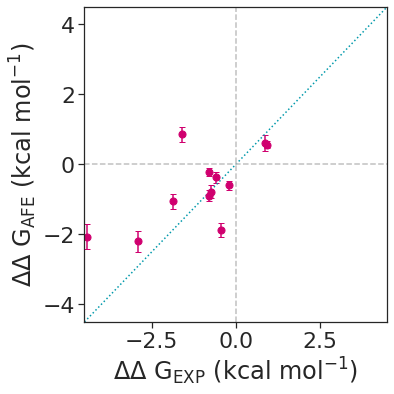

In [100]:
plt.figure(figsize=(6, 6))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plt.scatter(ddg_exp, ddg_afe, s=50, color="#D0006F")
plt.scatter(3, 2.5, s=0)

(_, caps, _) = plt.errorbar(ddg_exp,
                           ddg_afe,
                           color="#D0006F",
                           yerr=afe_err,
                           capsize=3,
                           linestyle="",
                           zorder=-1)

plt.plot([-4.5, 4.5], [-4.5, 4.5], color="#0099AB", linestyle=":", zorder=-1)
plt.vlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)
plt.hlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)

plt.xlabel(r"$\Delta\Delta$ G$_{\mathrm{EXP}}$ (kcal mol$^{-1}$)")
plt.ylabel(r"$\Delta\Delta$ G$_{\mathrm{AFE}}$ (kcal mol$^{-1}$)")
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.tight_layout()
plt.savefig("../../plots/free_energy/correlation.pdf")



In [27]:
pearson_r = scipy.stats.pearsonr(ddg_exp, ddg_afe)
pearson_r

(0.6674936193034686, 0.017707030166272474)